### exploring

In [ ]:
import csv, json, warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
import pandas as pd

'''

API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to HOME_VALUES dictionary

'''

METRO_AND_US_HOME_VALUES = {
    'ZHVI All Homes (SFR, Condo/Co-op) Time Series, Smoothed, Seasonally Adjusted ($)': './data/csv/metro_and_us/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI All Homes (SFR, Condo/Co-op) Time Series, Raw, Mid-Tier ($)': './data/csv/metro_and_us/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv',
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/metro_and_us/Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/metro_and_us/Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/metro_and_us/Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/metro_and_us/Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/metro_and_us/Metro_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

STATE_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/state/State_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

ZIP_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/zip/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

COUNTY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/county/County_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

NEIGHBORHOOD_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/neighborhood/Neighborhood_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

one_bedroom_homes = METRO_AND_US_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]
two_bedroom_homes = METRO_AND_US_HOME_VALUES["ZHVI 2-Bedroom Time Series ($)"]
three_bedroom_homes = METRO_AND_US_HOME_VALUES["ZHVI 3-Bedroom Time Series ($)"]
four_bedroom_homes = METRO_AND_US_HOME_VALUES["ZHVI 4-Bedroom Time Series ($)"]
five_bedroom_homes = METRO_AND_US_HOME_VALUES["ZHVI 5-Bedroom Time Series ($)"]

city_one_bedroom_homes = CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]

state_one_bedroom_homes = STATE_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]

zip_one_bedroom_homes = ZIP_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]

county_one_bedroom_homes = COUNTY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]

neighborhood_one_bedroom_homes = NEIGHBORHOOD_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]

def load_csv(filename: str) -> list:
    with open(filename, "r") as file:
        reader = csv.reader(file)
        # next(reader)
        data = list(reader)
        return data

def main():
    
    affordable_home_price = 400000
    
    # # data = load_csv(csv_file)
    # # print(json.dumps(data, indent=4))
    # print("=" * 90)
    # print("Metro and US Data\n")
    # df = pd.read_csv(one_bedroom_homes)
    # df.dropna(inplace=True)
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    
    print("=" * 90)    
    print("City Data\n")
    df = pd.read_csv(city_one_bedroom_homes)
    
    # print(df.head())
    # print(df.columns)
    
    time_series_cols = df.columns[8:]
    # print(time_series_cols)
    # print(time_series_cols[:5]) 
    data_cleaned = df.dropna(subset=time_series_cols).reset_index(drop=True)
    
    data_cleaned['AvgGrowthRate'] = data_cleaned[time_series_cols].pct_change(axis=1).mean(axis=1)
    data_cleaned['TotalGrowth'] = (data_cleaned[time_series_cols[-1]] - data_cleaned[time_series_cols[0]]) / data_cleaned[time_series_cols[0]]
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].shape)  # Check the number of rows
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].tail(10))  # View more rows
    
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].sort_values(by='TotalGrowth', ascending=False).head(50))
    
    features = ['AvgGrowthRate', 'TotalGrowth']
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data_cleaned[features])
    print(features_scaled)
    # print("=" * 90) 
    # data_cleaned["ScaledAvgGrowthRate"] = features_scaled[:, 0]
    # data_cleaned["ScaledTotalGrowth"] = features_scaled[:, 1]
    # print(data_cleaned[['RegionName', 'State', 'ScaledAvgGrowthRate', 'ScaledTotalGrowth']].sort_values(by='ScaledTotalGrowth', ascending=False).head(50))
    
    # # print(df.shape)  # Before filtering
    # # print(data_cleaned.shape)  # After cleaning

    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        clusters = kmeans.predict(features_scaled)
        data_cleaned[f'Cluster{k}'] = clusters
    
    
    
    
    
    
    
    
    # print(data_cleaned)
    region_name = data_cleaned['RegionName']
    # print(region_name)
    
    # # Average growth rate
    # data_cleaned['AvgGrowthRate'] = data_cleaned[time_series_cols].pct_change(axis=1).mean(axis=1)
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate']].head())
    
    # df.dropna(inplace=True)
    # print(df.columns)

    
    
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20))
    # print(df[df["RegionName"] == "San Diego"])
    # print(df[df["RegionName"] == "Los Angeles"])
    
    # print("=" * 90) 
    # print("State Data\n")
    # df = pd.read_csv(state_one_bedroom_homes)    
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    # print(df[df["RegionName"] == "California"])
    # print(df[df["RegionName"] == "Texas"])
    
    # print("=" * 90) 
    # print("Zip Code Data\n")
    # df = pd.read_csv(zip_one_bedroom_homes)    
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    # print(df[df["RegionName"] == 92103])
    # print(df[df["RegionName"] == 92109])
    
    # print("=" * 90) 
    # print("County Data\n")
    # df = pd.read_csv(county_one_bedroom_homes)    
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    # print(df[df["RegionName"] == "San Diego County"])
    # print(df[df["RegionName"] == "Humboldt County"])
    
    # print("=" * 90) 
    # print("Neighborhood Data\n")
    # df = pd.read_csv(neighborhood_one_bedroom_homes)    
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    # print(df[df["RegionName"] == "Linda Vista"])
    # print(df[df["RegionName"] == "Hollywood"])
    
if __name__ == "__main__":
    main()



In [ ]:
import csv, json, warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
import pandas as pd

'''

API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to HOME_VALUES dictionary

'''

CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

city_one_bedroom_homes = CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]


def load_csv(filename: str) -> list:
    with open(filename, "r") as file:
        reader = csv.reader(file)
        # next(reader)
        data = list(reader)
        return data

def main():
    
    affordable_home_price = 400000
    
    # # data = load_csv(csv_file)
    # # print(json.dumps(data, indent=4))
    # print("=" * 90)
    # print("Metro and US Data\n")
    # df = pd.read_csv(one_bedroom_homes)
    # df.dropna(inplace=True)
    # # print(df.head())
    # # print(df.tail())  
    # # print(df.describe())    
    # print(df.sample(20)) 
    
    print("=" * 90)    
    print("City Data\n")
    df = pd.read_csv(city_one_bedroom_homes)
    
    # print(df.head())
    # print(df.columns)
    
    time_series_cols = df.columns[8:]
    # print(time_series_cols)
    # print(time_series_cols[:5]) 
    data_cleaned = df.dropna(subset=time_series_cols).reset_index(drop=True)
    
    data_cleaned['AvgGrowthRate'] = data_cleaned[time_series_cols].pct_change(axis=1).mean(axis=1)
    data_cleaned['TotalGrowth'] = (data_cleaned[time_series_cols[-1]] - data_cleaned[time_series_cols[0]]) / data_cleaned[time_series_cols[0]]
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].shape)  # Check the number of rows
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].tail(10))  # View more rows
    
    # print(data_cleaned[['RegionName', 'State', 'AvgGrowthRate', 'TotalGrowth']].sort_values(by='TotalGrowth', ascending=False).head(50))
    
    features = ['AvgGrowthRate', 'TotalGrowth']
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data_cleaned[features])
    # print(features_scaled)
    # print("=" * 90) 
    # data_cleaned["ScaledAvgGrowthRate"] = features_scaled[:, 0]
    # data_cleaned["ScaledTotalGrowth"] = features_scaled[:, 1]
    print(data_cleaned[['RegionName', 'State', 'ScaledAvgGrowthRate', 'ScaledTotalGrowth']].sort_values(by='ScaledTotalGrowth', ascending=False).head(50))
    
    # # print(df.shape)  # Before filtering
    # # print(data_cleaned.shape)  # After cleaning

    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        clusters = kmeans.predict(features_scaled)
        data_cleaned[f'Cluster{k}'] = clusters
    
    
    
if __name__ == "__main__":
    main()

In [122]:
import csv, json, warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''

API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to HOME_VALUES dictionary

'''

CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

city_one_bedroom_homes = CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"]


def load_csv(filename: str) -> list:
    with open(filename, "r") as file:
        reader = csv.reader(file)
        # next(reader)
        data = list(reader)
        return data


def build_k_means_model():
    k_means = sklearn.cluster.KMeans(n_clusters=4)
    # k_means.labels_
    # k_means.cluster_centers_

def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def main():
    
    affordable_home_price = 400000
    
    start_year = "2020"
    
    df = pd.read_csv(city_one_bedroom_homes)
    # print(df.head())
    # print(df.tail())
    # print(df.sample(20))
    # print(df.describe())
    
    # # Summary of the dataset
    # print(df.info())
    
    # print columns
    # print(df.columns)
    
    # # Check for missing values
    # print(df.isnull().sum())
    
    # # Descriptive statistics
    # print(df.describe())
    
    date_columns = [col for col in df.columns if col.startswith("20") and col >= start_year]
    
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    # print(df_sorted)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    # print(missing_summary)
        
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns
    # print(filtered_columns)
    
    
    
    
    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * 0.4
    # print(threshold)
    
    df_cleaned = df[df["missing_home_values"] <= threshold]
    # print(df_cleaned)
    
    df = df_cleaned[filtered_columns]
    # print(df.sample(100))
    
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)    
    print(df)
    
    # df = df.dropna(subset=date_columns)
    # print(df.sample(100))
    
    # missing_data_columns = df.isnull().sum()
    # print(missing_data_columns)
    
    # Create a column that lists the missing columns per row

    # print(df)
    
    # Drop columns 
    
    # test_missing_data(df)
        
    # # Heatmap of missing values
    # # Calculate the percentage of missing values
    # missing_percentage = (df.isnull().sum() / len(df)) * 100
    # print(missing_percentage)
    
    # # Sort by missing percentage and select top 20
    # top_missing = missing_percentage.sort_values(ascending=False).head(20)

    # # Plot the top 20
    # top_missing.plot(kind='bar', figsize=(10, 5), title="Top 20 Columns with Missing Data")
    # plt.xticks(rotation=45)  # Rotate for better visibility
    # plt.show()
    
    
if __name__ == "__main__":
    main()

                   RegionName State    2020-01-31    2020-02-29    2020-03-31    2020-04-30    2020-05-31    2020-06-30    2020-07-31    2020-08-31    2020-09-30    2020-10-31    2020-11-30    2020-12-31    2021-01-31    2021-02-28    2021-03-31    2021-04-30    2021-05-31    2021-06-30    2021-07-31    2021-08-31    2021-09-30    2021-10-31    2021-11-30    2021-12-31    2022-01-31    2022-02-28    2022-03-31    2022-04-30    2022-05-31    2022-06-30    2022-07-31    2022-08-31    2022-09-30    2022-10-31    2022-11-30    2022-12-31    2023-01-31    2023-02-28    2023-03-31    2023-04-30    2023-05-31    2023-06-30    2023-07-31    2023-08-31    2023-09-30    2023-10-31    2023-11-30    2023-12-31    2024-01-31    2024-02-29    2024-03-31    2024-04-30    2024-05-31    2024-06-30    2024-07-31    2024-08-31    2024-09-30    2024-10-31
0                    New York    NY  5.725275e+05  5.730940e+05  5.732015e+05  5.718723e+05  5.708954e+05  5.692489e+05  5.665136e+05  5.611711e+05  5.5

## Pandas demo

In [ ]:
import pandas as pd

# Create a DataFrame with some missing values
df = pd.DataFrame({'A': [1, 2, None], 'B': [3, None, 4]})
print(df)
# Count the number of missing values in each column
missing_values = df.isnull().sum()

print(missing_values)

## v2

0 sil score: 0.41736300878135496
1 sil score: 0.3290872206066412
2 sil score: 0.324134378516139
3 sil score: 0.33486994627778444
4 sil score: 0.3066049495710747
5 sil score: 0.3190173994224088
6 sil score: 0.31547636775692256
7 sil score: 0.31737298584296136
8 sil score: 0.31397660966870794

Best silhouette score: 0.41736300878135496
K-Mean value: 2


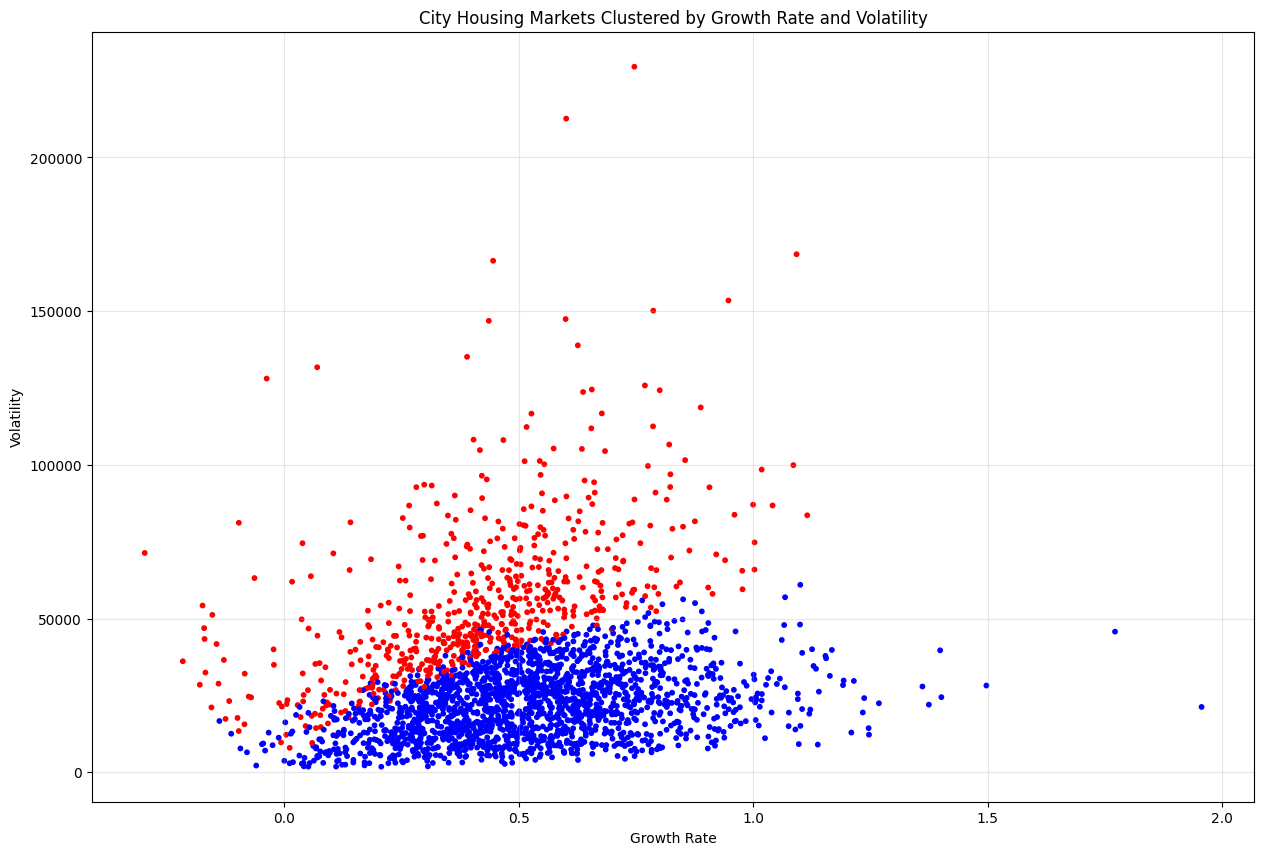

In [274]:
import csv, json, warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''

API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to HOME_VALUES dictionary

'''

CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.05
}

def preprocess_data(df):
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Replace with the index of your desired start year column
    start_year_column = df.iloc[:, start_year_index]  # Select the column at index 5
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    # print(df.sort_values(by="AveragePrice", ascending=False).head(50)[columns])
    # df = df.sort_values(by="AveragePrice", ascending=False)[columns]
    df = df[columns]
    return df

def scale_features(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    k_means = sklearn.cluster.KMeans(n_clusters=4)
    max_sil = 0
    k_value = 0
    
    for idx, k in enumerate(range(2, 11, 1)):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        print(f"{idx} sil score: {sil}")
        if sil > max_sil:
            max_sil = sil
            k_value = k
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results):
    # Create color mapping
    color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    colors = [color_map[label] for label in k_means_results["labels"]]
    # Create the scatter plot
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(df[feature_one], df[feature_two], c=colors, s=10)
    # plt.tight_layout()
    
    # for index, row in df.iterrows():
    #     plt.annotate(f"{row["RegionName"]}, {row["State"]}",
    #                  (row["GrowthRate"], row["Volatility"]),
    #                  xytext=(5, 5), textcoords="offset points",
    #                  fontsize=8)
    # Customize plot
    plt.title("City Housing Markets Clustered by Growth Rate and Volatility")
    plt.xlabel("Growth Rate")
    plt.ylabel("Volatility")
    plt.grid(True, alpha=0.3)
    
    plt.show()
    return scatter
    

def main():        
    df = pd.read_csv(CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"])
    
    df = preprocess_data(df)
    
    features = df[["GrowthRate", "Volatility", "AveragePrice"]]
    # print(features)
    
    scaled_features = scale_features(features)
    # print(scaled_features)
    
    k_means_results = build_k_means_model(scaled_features)
    
    
    scatter = plot_data(df, feature_one="GrowthRate", feature_two="Volatility", k_means_results=k_means_results)
    
    
    # # Create color mapping
    # color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    # colors = [color_map[label] for label in k_means_results["labels"]]
    
    # # Create the scatter plot
    # plt.figure(figsize=(15, 10))
    
    # scatter = plt.scatter(df, feature_one="GrowthRate", feature_two="Volatility", c=colors, s=10)
    # # plt.tight_layout()
    
    # # for index, row in df.iterrows():
    # #     plt.annotate(f"{row["RegionName"]}, {row["State"]}",
    # #                  (row["GrowthRate"], row["Volatility"]),
    # #                  xytext=(5, 5), textcoords="offset points",
    # #                  fontsize=8)
    

    # # Customize plot
    # plt.title("City Housing Markets Clustered by Growth Rate and Volatility")
    # plt.xlabel("Growth Rate")
    # plt.ylabel("Volatility")
    # plt.grid(True, alpha=0.3)
    
    # plt.show()
    
    
    
    
if __name__ == "__main__":
    main()

## v3

In [ ]:
import csv, json, warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''

API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to HOME_VALUES dictionary

'''

CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.05
}

def preprocess_data(df):
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Replace with the index of your desired start year column
    start_year_column = df.iloc[:, start_year_index]  # Select the column at index 5
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    # print(df.sort_values(by="AveragePrice", ascending=False).head(50)[columns])
    # df = df.sort_values(by="AveragePrice", ascending=False)[columns]
    df = df[columns]
    return df

def scale_features(features):
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    k_means = sklearn.cluster.KMeans(n_clusters=4)
    max_sil = 0
    k_value = 0
    
    for idx, k in enumerate(range(2, 11, 1)):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        if sil > max_sil:
            max_sil = sil
            k_value = k
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results, num_bedrooms, city_names=False):
    # Create color mapping
    color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    colors = [color_map[label] for label in k_means_results["labels"]]
    # Create the scatter plot
    plt.figure(figsize=(15, 10))
    plt.scatter(df[feature_one], df[feature_two], c=colors, s=10)
    if city_names:
        for index, row in df.iterrows():
            plt.annotate(f"{row["RegionName"]}, {row["State"]}",
                        (row[feature_one], row[feature_two]),
                        xytext=(5, 5), textcoords="offset points",
                        fontsize=8)
    
    # Customize plot
    plt.title(f"{num_bedrooms}\nCity Housing Markets Clustered by {feature_one} and {feature_two}")
    plt.xlabel(feature_one)
    plt.ylabel(feature_two)
    plt.grid(True, alpha=0.3)
    
    plt.show()

def prompt_user():
    # Valid inputs for features and bedrooms
    valid_inputs = ["GrowthRate", "Volatility", "AveragePrice"]
    valid_bedrooms = {
        "1": "1-Bedroom",
        "2": "2-Bedroom",
        "3": "3-Bedroom",
        "4": "4-Bedroom",
        "5": "5+ Bedroom"
    }
    
    def display_bedroom_options():
        print("\nSelect number of bedrooms:")
        for num, desc in valid_bedrooms.items():
            print(f"{num}. {desc}")
        print("(Enter 'e' to exit)")
    
    def display_feature_options():
        print("\nAvailable variables to visualize:")
        for i, option in enumerate(valid_inputs, 1):
            print(f"{i}. {option}")
        print("(Enter 'e' to exit)")

    def get_bedroom_choice():
        while True:
            display_bedroom_options()
            choice = input("\nEnter number of bedrooms: ").strip()
            
            if choice.lower() == 'e':
                return None
                
            if choice in valid_bedrooms:
                return choice
                
            print("\nInvalid input. Please enter a number between 1-5.")

    def get_feature(prompt_text):
        while True:
            display_feature_options()
            choice = input(prompt_text).strip()
            
            # Check for exit
            if choice.lower() == 'e':
                return None
            
            # Handle numeric input
            if choice.isdigit() and 1 <= int(choice) <= len(valid_inputs):
                return valid_inputs[int(choice) - 1]
            
            # Handle text input
            if choice in valid_inputs:
                return choice
            
            print(f"\nInvalid input. Please enter a number (1-{len(valid_inputs)})" 
                  f" or the exact variable name.")

    # Get bedroom choice first
    bedrooms = get_bedroom_choice()
    if bedrooms is None:
        return None

    # Get first feature
    feature_one = get_feature("\nSelect first variable: ")
    if feature_one is None:
        return None

    # Get second feature
    feature_two = get_feature("\nSelect second variable: ")
    if feature_two is None:
        return None
        
    # Check if same features selected
    if feature_one == feature_two:
        print("\nWarning: You've selected the same variable twice. "
              "This may not provide meaningful insights.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return prompt_user()  # Restart selection

    match bedrooms:
        case "1":
            bedrooms = "ZHVI 1-Bedroom Time Series ($)"
        case "2":
            bedrooms = "ZHVI 2-Bedroom Time Series ($)"
        case "3":
            bedrooms = "ZHVI 3-Bedroom Time Series ($)"
        case "4":
            bedrooms = "ZHVI 4-Bedroom Time Series ($)"
        case "5":
            bedrooms = "ZHVI 5-Bedroom Time Series ($)"

    
    return {
        "bedrooms": bedrooms,
        "features": [feature_one, feature_two]
    }

def main():        
    user_input = prompt_user()
        
    df = pd.read_csv(CITY_HOME_VALUES[user_input["bedrooms"]])
    
    df = preprocess_data(df)
    
    features = df[["GrowthRate", "Volatility", "AveragePrice"]]
    
    scaled_features = scale_features(features)
    
    k_means_results = build_k_means_model(scaled_features)
    
    plot_data(df=df, 
              feature_one=user_input["features"][0], 
              feature_two=user_input["features"][1], 
              k_means_results=k_means_results, 
              city_names=False,
              num_bedrooms=user_input["bedrooms"])    
    
    
if __name__ == "__main__":
    main()

: 

### Matplotlib


Select number of bedrooms:
1. 1-Bedroom
2. 2-Bedroom
3. 3-Bedroom
4. 4-Bedroom
5. 5+ Bedroom
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Best silhouette score: 0.4179328093594261
K-Mean value: 2


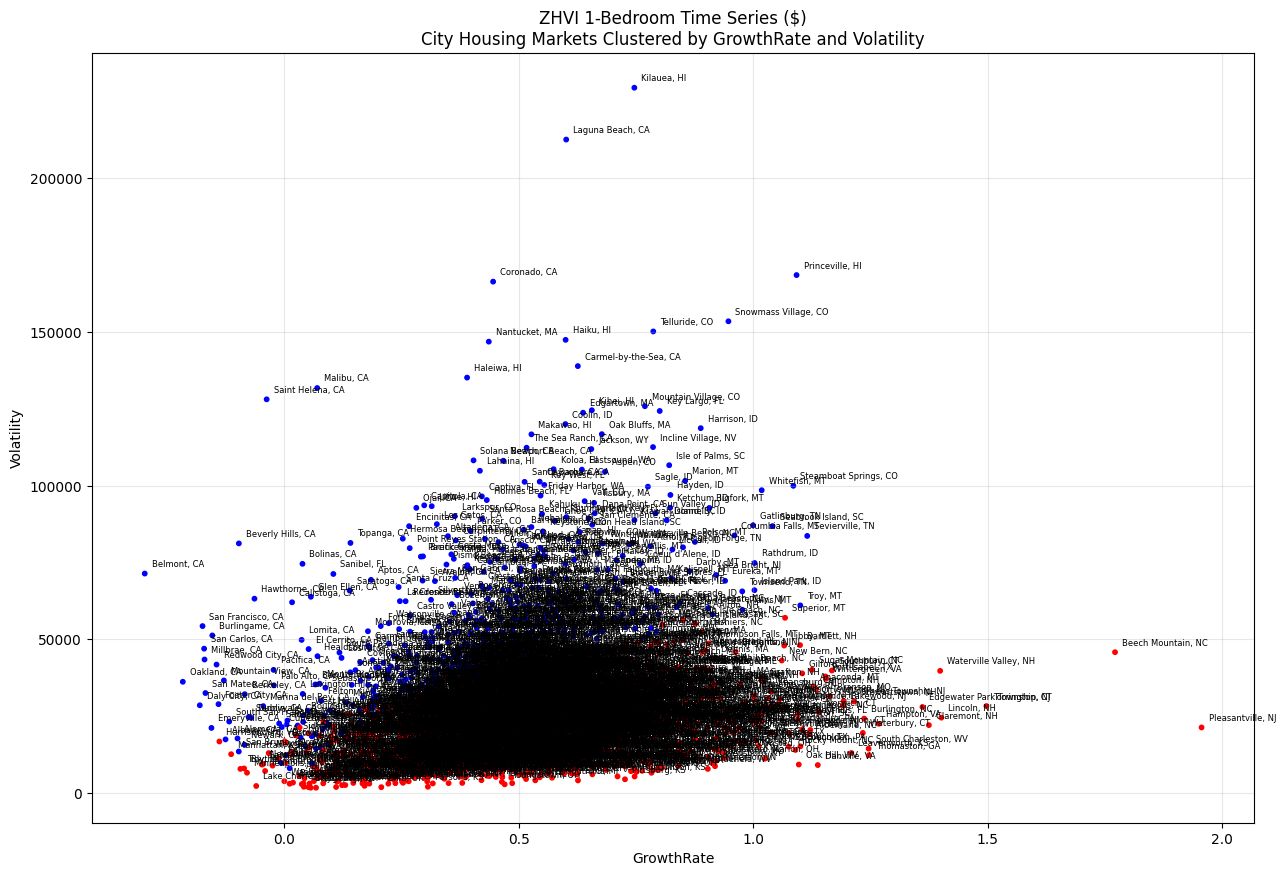

In [2]:
import warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''
API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to CITY_HOME_VALUES dictionary

Housing Market Cluster Analysis program: Visualizes and analyzes housing market patterns 
across cities using Zillow's Home Value Index (ZHVI) data, allowing users to explore 
relationships between growth rates, volatility, and average prices for different 
bedroom configurations.
'''

# Configure data file paths
CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.25
}

# Test for missing data
def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="housing_df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False



def preprocess_data(df) -> pd.DataFrame:
    """
    Preprocesses the data frame by extracting date columns, filtering out rows with missing home values, 
    and filling in missing values using interpolation, back fill, and front fill.

    Args:
        df (pd.DataFrame): The data frame to preprocess

    Returns:
        pd.DataFrame: The preprocessed data frame
    """
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Index of the first date column
    start_year_column = df.iloc[:, start_year_index]  # Select the first column in the DataFrame
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    # Calculate growth rate, volatility, and average price
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    df = df[columns]
    return df

def scale_features(features):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    Args:
        features (pd.DataFrame): DataFrame containing numerical features to be scaled
    Returns:
        numpy.ndarray: Scaled feature array with mean=0 and variance=1
    """
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    """
    Builds a K-Means clustering model using the given scaled features and returns the cluster centers, labels, and model.
    Uses silhouette scoring to determine the optimal number of clusters (k) between 2 and 10.

    Args:
        scaled_features (numpy.ndarray): Standardized numerical features to be used for clustering

    Returns:
        dict: {
            'cluster_centers': numpy.ndarray
                Coordinates of cluster centers,
            'labels': numpy.ndarray
                Cluster labels for each data point,
            'k_means': sklearn.cluster.KMeans
                Fitted K-Means model with optimal number of clusters
        }
    """    
    max_sil = 0
    k_value = 0
    
    # Determine optimal number of clusters using silhouette score
    for k in range(2, 11, 1):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        if sil > max_sil:
            max_sil = sil
            k_value = k
            
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results, num_bedrooms, city_names=False):
    """
    Creates a scatter plot visualizing housing market clusters based on two selected features.
    Points are color-coded by cluster and can optionally display city names.
    Args:
       df (pd.DataFrame): Housing market data
       feature_one (str): Column name for x-axis feature 
       feature_two (str): Column name for y-axis feature
       k_means_results (dict): Dictionary with clustering results including 'labels'
       num_bedrooms (str): Bedroom count identifier for plot title
       city_names (bool, optional): Show city name labels. Defaults to False

    Returns:
       None: Displays matplotlib scatter plot
    """
    # Create color mapping
    color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    colors = [color_map[label] for label in k_means_results["labels"]]
    # Create the scatter plot
    plt.figure(figsize=(15, 10))
    plt.scatter(df[feature_one], df[feature_two], c=colors, s=10)
    if city_names:
        for index, row in df.iterrows():
            plt.annotate(f"{row["RegionName"]}, {row["State"]}",
                        (row[feature_one], row[feature_two]),
                        xytext=(5, 5), textcoords="offset points",
                        fontsize=6)
    
    # Customize plot
    plt.title(f"{num_bedrooms}\nCity Housing Markets Clustered by {feature_one} and {feature_two}")
    plt.xlabel(feature_one)
    plt.ylabel(feature_two)
    plt.grid(True, alpha=0.3)
    
    plt.show()

def prompt_user():
    """
    Prompts user to select bedroom count and visualization features.

    Returns:
        dict: {
            'bedrooms': str
                ZHVI dataset identifier based on bedroom count,
            'features': list[str]
                Two feature names for visualization
        } or None if user exits
    """
    # Valid inputs for features and bedrooms
    valid_inputs = ["GrowthRate", "Volatility", "AveragePrice"]
    valid_bedrooms = {
        "1": "1-Bedroom",
        "2": "2-Bedroom",
        "3": "3-Bedroom",
        "4": "4-Bedroom",
        "5": "5+ Bedroom"
    }
    
    def display_bedroom_options():
        print("\nSelect number of bedrooms:")
        for num, desc in valid_bedrooms.items():
            print(f"{num}. {desc}")
        print("(Enter 'e' to exit)")
    
    def display_feature_options():
        print("\nAvailable variables to visualize:")
        for i, option in enumerate(valid_inputs, 1):
            print(f"{i}. {option}")
        print("(Enter 'e' to exit)")

    def get_bedroom_choice():
        while True:
            display_bedroom_options()
            choice = input("\nEnter number of bedrooms: ").strip()
            
            if choice.lower() == 'e':
                return None
                
            if choice in valid_bedrooms:
                return choice
                
            print("\nInvalid input. Please enter a number between 1-5.")

    def get_feature(prompt_text):
        while True:
            display_feature_options()
            choice = input(prompt_text).strip()
            
            # Check for exit
            if choice.lower() == 'e':
                return None
            
            # Handle numeric input
            if choice.isdigit() and 1 <= int(choice) <= len(valid_inputs):
                return valid_inputs[int(choice) - 1]
            
            # Handle text input
            if choice in valid_inputs:
                return choice
            
            print(f"\nInvalid input. Please enter a number (1-{len(valid_inputs)})" 
                  f" or the exact variable name.")

    # Get bedroom choice first
    bedrooms = get_bedroom_choice()
    if bedrooms is None:
        return None

    # Get first feature
    feature_one = get_feature("\nSelect first variable: ")
    if feature_one is None:
        return None

    # Get second feature
    feature_two = get_feature("\nSelect second variable: ")
    if feature_two is None:
        return None
        
    # Check if same features selected
    if feature_one == feature_two:
        print("\nWarning: You've selected the same variable twice. "
              "This may not provide meaningful insights.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return prompt_user()  # Restart selection

    match bedrooms:
        case "1":
            bedrooms = "ZHVI 1-Bedroom Time Series ($)"
        case "2":
            bedrooms = "ZHVI 2-Bedroom Time Series ($)"
        case "3":
            bedrooms = "ZHVI 3-Bedroom Time Series ($)"
        case "4":
            bedrooms = "ZHVI 4-Bedroom Time Series ($)"
        case "5":
            bedrooms = "ZHVI 5-Bedroom Time Series ($)"

    
    return {
        "bedrooms": bedrooms,
        "features": [feature_one, feature_two]
    }

def main():        
    user_input = prompt_user()
    
    if user_input:
        try:
            df = pd.read_csv(CITY_HOME_VALUES[user_input["bedrooms"]])
            
            df = preprocess_data(df)
            
            features = df[["GrowthRate", "Volatility", "AveragePrice"]]
            
            scaled_features = scale_features(features)
            
            k_means_results = build_k_means_model(scaled_features)
            
            plot_data(df=df, 
                    feature_one=user_input["features"][0], 
                    feature_two=user_input["features"][1], 
                    k_means_results=k_means_results, 
                    city_names=True,
                    num_bedrooms=user_input["bedrooms"])   
        except Exception as e:
            print(f"An error occurred: {e}") 
    else:
        print("No user input provided. Exiting program.")
    
if __name__ == "__main__":
    main()

### adjustText


Select number of bedrooms:
1. 1-Bedroom
2. 2-Bedroom
3. 3-Bedroom
4. 4-Bedroom
5. 5+ Bedroom
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Best silhouette score: 0.4179328093594261
K-Mean value: 2


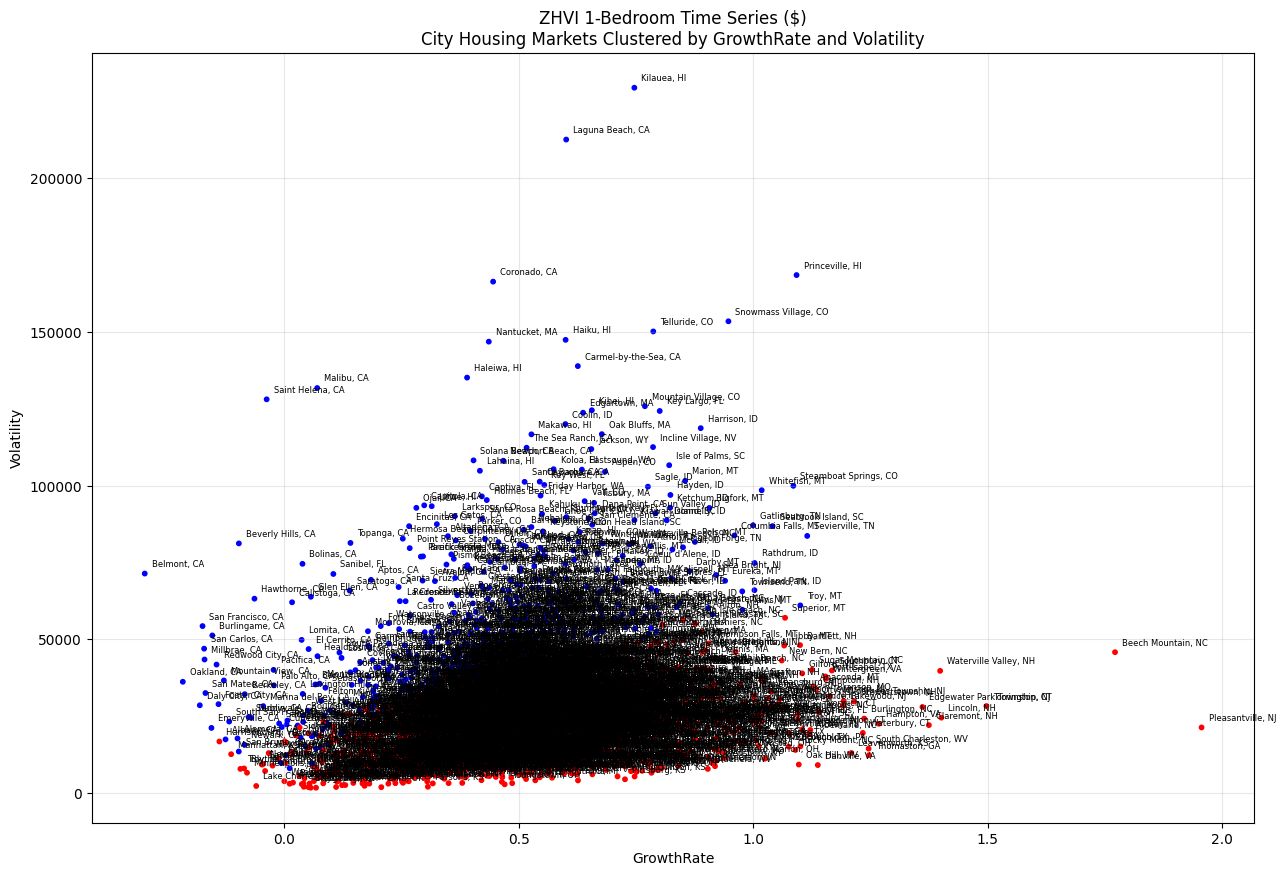

In [3]:
import warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from adjustText import adjust_text
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''
API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to CITY_HOME_VALUES dictionary

Housing Market Cluster Analysis program: Visualizes and analyzes housing market patterns 
across cities using Zillow's Home Value Index (ZHVI) data, allowing users to explore 
relationships between growth rates, volatility, and average prices for different 
bedroom configurations.
'''

# Configure data file paths
CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.25
}

# Test for missing data
def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="housing_df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False



def preprocess_data(df) -> pd.DataFrame:
    """
    Preprocesses the data frame by extracting date columns, filtering out rows with missing home values, 
    and filling in missing values using interpolation, back fill, and front fill.

    Args:
        df (pd.DataFrame): The data frame to preprocess

    Returns:
        pd.DataFrame: The preprocessed data frame
    """
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Index of the first date column
    start_year_column = df.iloc[:, start_year_index]  # Select the first column in the DataFrame
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    # Calculate growth rate, volatility, and average price
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    df = df[columns]
    return df

def scale_features(features):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    Args:
        features (pd.DataFrame): DataFrame containing numerical features to be scaled
    Returns:
        numpy.ndarray: Scaled feature array with mean=0 and variance=1
    """
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    """
    Builds a K-Means clustering model using the given scaled features and returns the cluster centers, labels, and model.
    Uses silhouette scoring to determine the optimal number of clusters (k) between 2 and 10.

    Args:
        scaled_features (numpy.ndarray): Standardized numerical features to be used for clustering

    Returns:
        dict: {
            'cluster_centers': numpy.ndarray
                Coordinates of cluster centers,
            'labels': numpy.ndarray
                Cluster labels for each data point,
            'k_means': sklearn.cluster.KMeans
                Fitted K-Means model with optimal number of clusters
        }
    """    
    max_sil = 0
    k_value = 0
    
    # Determine optimal number of clusters using silhouette score
    for k in range(2, 11, 1):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        if sil > max_sil:
            max_sil = sil
            k_value = k
            
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results, num_bedrooms, city_names=False):
    """
    Creates a scatter plot visualizing housing market clusters based on two selected features.
    Points are color-coded by cluster and can optionally display city names.
    Args:
       df (pd.DataFrame): Housing market data
       feature_one (str): Column name for x-axis feature 
       feature_two (str): Column name for y-axis feature
       k_means_results (dict): Dictionary with clustering results including 'labels'
       num_bedrooms (str): Bedroom count identifier for plot title
       city_names (bool, optional): Show city name labels. Defaults to False

    Returns:
       None: Displays matplotlib scatter plot
    """
    # Create color mapping
    color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    colors = [color_map[label] for label in k_means_results["labels"]]
    # Create the scatter plot
    plt.figure(figsize=(15, 10))
    plt.scatter(df[feature_one], df[feature_two], c=colors, s=10)
    if city_names:
        texts = []
        for index, row in df.iterrows():
            plt.annotate(f"{row["RegionName"]}, {row["State"]}",
                        (row[feature_one], row[feature_two]),
                        xytext=(5, 5), textcoords="offset points",
                        fontsize=6)
            adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))
    
    # Customize plot
    plt.title(f"{num_bedrooms}\nCity Housing Markets Clustered by {feature_one} and {feature_two}")
    plt.xlabel(feature_one)
    plt.ylabel(feature_two)
    plt.grid(True, alpha=0.3)
    
    plt.show()

def prompt_user():
    """
    Prompts user to select bedroom count and visualization features.

    Returns:
        dict: {
            'bedrooms': str
                ZHVI dataset identifier based on bedroom count,
            'features': list[str]
                Two feature names for visualization
        } or None if user exits
    """
    # Valid inputs for features and bedrooms
    valid_inputs = ["GrowthRate", "Volatility", "AveragePrice"]
    valid_bedrooms = {
        "1": "1-Bedroom",
        "2": "2-Bedroom",
        "3": "3-Bedroom",
        "4": "4-Bedroom",
        "5": "5+ Bedroom"
    }
    
    def display_bedroom_options():
        print("\nSelect number of bedrooms:")
        for num, desc in valid_bedrooms.items():
            print(f"{num}. {desc}")
        print("(Enter 'e' to exit)")
    
    def display_feature_options():
        print("\nAvailable variables to visualize:")
        for i, option in enumerate(valid_inputs, 1):
            print(f"{i}. {option}")
        print("(Enter 'e' to exit)")

    def get_bedroom_choice():
        while True:
            display_bedroom_options()
            choice = input("\nEnter number of bedrooms: ").strip()
            
            if choice.lower() == 'e':
                return None
                
            if choice in valid_bedrooms:
                return choice
                
            print("\nInvalid input. Please enter a number between 1-5.")

    def get_feature(prompt_text):
        while True:
            display_feature_options()
            choice = input(prompt_text).strip()
            
            # Check for exit
            if choice.lower() == 'e':
                return None
            
            # Handle numeric input
            if choice.isdigit() and 1 <= int(choice) <= len(valid_inputs):
                return valid_inputs[int(choice) - 1]
            
            # Handle text input
            if choice in valid_inputs:
                return choice
            
            print(f"\nInvalid input. Please enter a number (1-{len(valid_inputs)})" 
                  f" or the exact variable name.")

    # Get bedroom choice first
    bedrooms = get_bedroom_choice()
    if bedrooms is None:
        return None

    # Get first feature
    feature_one = get_feature("\nSelect first variable: ")
    if feature_one is None:
        return None

    # Get second feature
    feature_two = get_feature("\nSelect second variable: ")
    if feature_two is None:
        return None
        
    # Check if same features selected
    if feature_one == feature_two:
        print("\nWarning: You've selected the same variable twice. "
              "This may not provide meaningful insights.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return prompt_user()  # Restart selection

    match bedrooms:
        case "1":
            bedrooms = "ZHVI 1-Bedroom Time Series ($)"
        case "2":
            bedrooms = "ZHVI 2-Bedroom Time Series ($)"
        case "3":
            bedrooms = "ZHVI 3-Bedroom Time Series ($)"
        case "4":
            bedrooms = "ZHVI 4-Bedroom Time Series ($)"
        case "5":
            bedrooms = "ZHVI 5-Bedroom Time Series ($)"

    
    return {
        "bedrooms": bedrooms,
        "features": [feature_one, feature_two]
    }

def main():        
    user_input = prompt_user()
    
    if user_input:
        try:
            df = pd.read_csv(CITY_HOME_VALUES[user_input["bedrooms"]])
            
            df = preprocess_data(df)
            
            features = df[["GrowthRate", "Volatility", "AveragePrice"]]
            
            scaled_features = scale_features(features)
            
            k_means_results = build_k_means_model(scaled_features)
            
            plot_data(df=df, 
                    feature_one=user_input["features"][0], 
                    feature_two=user_input["features"][1], 
                    k_means_results=k_means_results, 
                    city_names=True,
                    num_bedrooms=user_input["bedrooms"])   
        except Exception as e:
            print(f"An error occurred: {e}") 
    else:
        print("No user input provided. Exiting program.")
    
if __name__ == "__main__":
    main()

### mplcursors


Select number of bedrooms:
1. 1-Bedroom
2. 2-Bedroom
3. 3-Bedroom
4. 4-Bedroom
5. 5+ Bedroom
(Enter 'e' to exit)



Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Best silhouette score: 0.41910214019509057
K-Mean value: 2


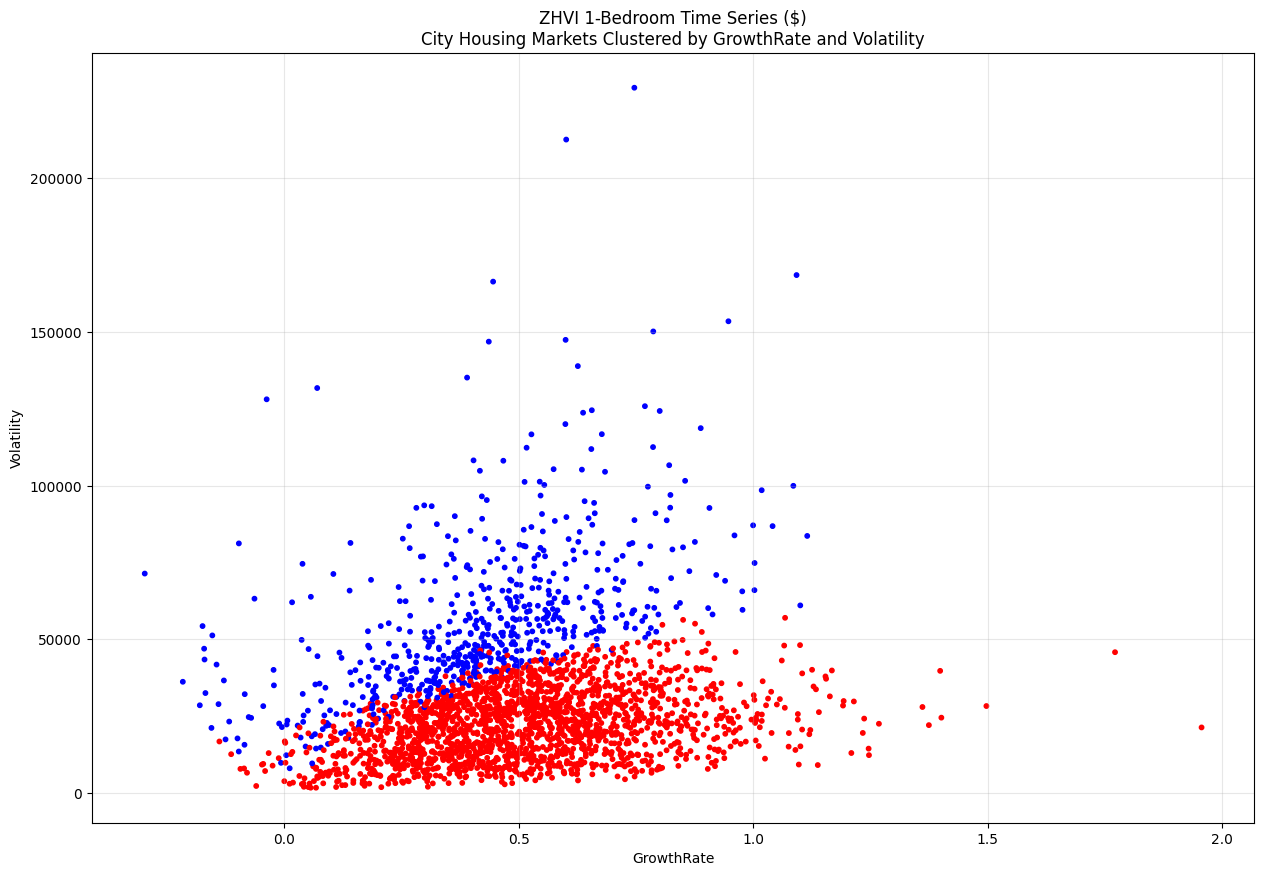

In [5]:
import warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mplcursors
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''
API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to CITY_HOME_VALUES dictionary

Housing Market Cluster Analysis program: Visualizes and analyzes housing market patterns 
across cities using Zillow's Home Value Index (ZHVI) data, allowing users to explore 
relationships between growth rates, volatility, and average prices for different 
bedroom configurations.
'''

# Configure data file paths
CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.25
}

# Test for missing data
def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="housing_df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False



def preprocess_data(df) -> pd.DataFrame:
    """
    Preprocesses the data frame by extracting date columns, filtering out rows with missing home values, 
    and filling in missing values using interpolation, back fill, and front fill.

    Args:
        df (pd.DataFrame): The data frame to preprocess

    Returns:
        pd.DataFrame: The preprocessed data frame
    """
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Index of the first date column
    start_year_column = df.iloc[:, start_year_index]  # Select the first column in the DataFrame
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    # Calculate growth rate, volatility, and average price
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    df = df[columns]
    return df

def scale_features(features):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    Args:
        features (pd.DataFrame): DataFrame containing numerical features to be scaled
    Returns:
        numpy.ndarray: Scaled feature array with mean=0 and variance=1
    """
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    """
    Builds a K-Means clustering model using the given scaled features and returns the cluster centers, labels, and model.
    Uses silhouette scoring to determine the optimal number of clusters (k) between 2 and 10.

    Args:
        scaled_features (numpy.ndarray): Standardized numerical features to be used for clustering

    Returns:
        dict: {
            'cluster_centers': numpy.ndarray
                Coordinates of cluster centers,
            'labels': numpy.ndarray
                Cluster labels for each data point,
            'k_means': sklearn.cluster.KMeans
                Fitted K-Means model with optimal number of clusters
        }
    """    
    max_sil = 0
    k_value = 0
    
    # Determine optimal number of clusters using silhouette score
    for k in range(2, 11, 1):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        if sil > max_sil:
            max_sil = sil
            k_value = k
            
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results, num_bedrooms, city_names=False):
    """
    Creates a scatter plot visualizing housing market clusters based on two selected features.
    Points are color-coded by cluster and can optionally display city names.
    Args:
       df (pd.DataFrame): Housing market data
       feature_one (str): Column name for x-axis feature 
       feature_two (str): Column name for y-axis feature
       k_means_results (dict): Dictionary with clustering results including 'labels'
       num_bedrooms (str): Bedroom count identifier for plot title
       city_names (bool, optional): Show city name labels. Defaults to False

    Returns:
       None: Displays matplotlib scatter plot
    """
    # Create color mapping
    color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
    colors = [color_map[label] for label in k_means_results["labels"]]
    # Create the scatter plot
    plt.figure(figsize=(15, 10))
    import mplcursors
    scatter = plt.scatter(df[feature_one], df[feature_two], c=colors, s=10)
    mplcursors.cursor(scatter, hover=True).connect(
    "add", lambda sel: sel.annotation.set_text(
        f"{df.iloc[sel.index]['RegionName']}, {df.iloc[sel.index]['State']}"))
    
    # Customize plot
    plt.title(f"{num_bedrooms}\nCity Housing Markets Clustered by {feature_one} and {feature_two}")
    plt.xlabel(feature_one)
    plt.ylabel(feature_two)
    plt.grid(True, alpha=0.3)
    
    plt.show()

def prompt_user():
    """
    Prompts user to select bedroom count and visualization features.

    Returns:
        dict: {
            'bedrooms': str
                ZHVI dataset identifier based on bedroom count,
            'features': list[str]
                Two feature names for visualization
        } or None if user exits
    """
    # Valid inputs for features and bedrooms
    valid_inputs = ["GrowthRate", "Volatility", "AveragePrice"]
    valid_bedrooms = {
        "1": "1-Bedroom",
        "2": "2-Bedroom",
        "3": "3-Bedroom",
        "4": "4-Bedroom",
        "5": "5+ Bedroom"
    }
    
    def display_bedroom_options():
        print("\nSelect number of bedrooms:")
        for num, desc in valid_bedrooms.items():
            print(f"{num}. {desc}")
        print("(Enter 'e' to exit)")
    
    def display_feature_options():
        print("\nAvailable variables to visualize:")
        for i, option in enumerate(valid_inputs, 1):
            print(f"{i}. {option}")
        print("(Enter 'e' to exit)")

    def get_bedroom_choice():
        while True:
            display_bedroom_options()
            choice = input("\nEnter number of bedrooms: ").strip()
            
            if choice.lower() == 'e':
                return None
                
            if choice in valid_bedrooms:
                return choice
                
            print("\nInvalid input. Please enter a number between 1-5.")

    def get_feature(prompt_text):
        while True:
            display_feature_options()
            choice = input(prompt_text).strip()
            
            # Check for exit
            if choice.lower() == 'e':
                return None
            
            # Handle numeric input
            if choice.isdigit() and 1 <= int(choice) <= len(valid_inputs):
                return valid_inputs[int(choice) - 1]
            
            # Handle text input
            if choice in valid_inputs:
                return choice
            
            print(f"\nInvalid input. Please enter a number (1-{len(valid_inputs)})" 
                  f" or the exact variable name.")

    # Get bedroom choice first
    bedrooms = get_bedroom_choice()
    if bedrooms is None:
        return None

    # Get first feature
    feature_one = get_feature("\nSelect first variable: ")
    if feature_one is None:
        return None

    # Get second feature
    feature_two = get_feature("\nSelect second variable: ")
    if feature_two is None:
        return None
        
    # Check if same features selected
    if feature_one == feature_two:
        print("\nWarning: You've selected the same variable twice. "
              "This may not provide meaningful insights.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return prompt_user()  # Restart selection

    match bedrooms:
        case "1":
            bedrooms = "ZHVI 1-Bedroom Time Series ($)"
        case "2":
            bedrooms = "ZHVI 2-Bedroom Time Series ($)"
        case "3":
            bedrooms = "ZHVI 3-Bedroom Time Series ($)"
        case "4":
            bedrooms = "ZHVI 4-Bedroom Time Series ($)"
        case "5":
            bedrooms = "ZHVI 5-Bedroom Time Series ($)"

    
    return {
        "bedrooms": bedrooms,
        "features": [feature_one, feature_two]
    }

def main():        
    user_input = prompt_user()
    
    if user_input:
        try:
            df = pd.read_csv(CITY_HOME_VALUES[user_input["bedrooms"]])
            
            df = preprocess_data(df)
            
            features = df[["GrowthRate", "Volatility", "AveragePrice"]]
            
            scaled_features = scale_features(features)
            
            k_means_results = build_k_means_model(scaled_features)
            
            plot_data(df=df, 
                    feature_one=user_input["features"][0], 
                    feature_two=user_input["features"][1], 
                    k_means_results=k_means_results, 
                    city_names=True,
                    num_bedrooms=user_input["bedrooms"])   
        except Exception as e:
            print(f"An error occurred: {e}") 
    else:
        print("No user input provided. Exiting program.")
    
if __name__ == "__main__":
    main()

### plotly

In [1]:
import warnings
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)       # Set a large enough width

# Set the column width to avoid truncation
pd.set_option('display.max_colwidth', None)

'''
API reference: https://www.zillow.com/research/data/
Data located in data/csv folder
Data file path mapped to CITY_HOME_VALUES dictionary

Housing Market Cluster Analysis program: Visualizes and analyzes housing market patterns 
across cities using Zillow's Home Value Index (ZHVI) data, allowing users to explore 
relationships between growth rates, volatility, and average prices for different 
bedroom configurations.
'''

# Configure data file paths
CITY_HOME_VALUES = {
    'ZHVI 1-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 2-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 3-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 4-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
    'ZHVI 5-Bedroom Time Series ($)': './data/csv/city/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv',
}

CONFIG = {
    "start_year": "2020",
    "number_bedrooms": CITY_HOME_VALUES["ZHVI 1-Bedroom Time Series ($)"],
    "missing_data_threshold_percent": 0.25
}

# Test for missing data
def test_missing_data(df):
    # Group columns by year
    missing_by_year = (
        df[[col for col in df.columns if '-' in col]]  # Select only date columns
        .isnull()
        .mean()
        .groupby(lambda col: col[:4])  # Group by year (first 4 characters of column name)
        .mean()
        * 100
    )
    
    print(missing_by_year)
    missing_by_year.plot(kind='line', figsize=(10, 6), marker='o', title="Missing Data Percentage by Year")
    plt.ylabel("Percentage of Missing Data")
    plt.xlabel("Year")
    plt.grid(True)
    plt.show()

def pd_export_csv(df, filepath="housing_df_output.csv"):
    print("Loading data frame to csv file ")
    try:
        df.to_csv(filepath, index=False)
        print("Data frame successfully loaded to csv file:")
        print(filepath)
        return True
    except Exception as e:
        print("Error loading data frame to csv")
        print(e)
        return False

def preprocess_data(df) -> pd.DataFrame:
    """
    Preprocesses the data frame by extracting date columns, filtering out rows with missing home values, 
    and filling in missing values using interpolation, back fill, and front fill.

    Args:
        df (pd.DataFrame): The data frame to preprocess

    Returns:
        pd.DataFrame: The preprocessed data frame
    """
    # Extract date columns give start_year
    date_columns = [col for col in df.columns if col.startswith("20") and col >= CONFIG["start_year"]]
    
    # Extract missing home values rows (Cities) from data columns
    df["missing_home_values"] = df[date_columns].isnull().sum(axis=1)
    
    # Sort missing home values ascending
    df_sorted = df.sort_values(by="missing_home_values", ascending=False)
    
    # Summarize missing home values by RegionName (city)
    missing_summary = df_sorted[['RegionName', 'missing_home_values']]
    
    # Filter only necessary columns
    # filtered_columns = ["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "State", "Metro", "CountyName"] + data_columns
    filtered_columns = ["RegionName", "State"] + date_columns

    # Drop rows with more than 50% missing home prices
    threshold = len(date_columns) * CONFIG["missing_data_threshold_percent"]
    
    # Extract rows given threshold
    df_cleaned = df[df["missing_home_values"] <= threshold]
    
    # Clean up data frame   
    df = df_cleaned[filtered_columns]
    
    # Fill remaining missing values using interpolation first, then back fill, then front fill
    df = df.apply(lambda row: row.interpolate(method="linear").fillna(method="bfill").fillna(method="ffill"), axis=1)  
    
    start_year_index = 2  # Index of the first date column
    start_year_column = df.iloc[:, start_year_index]  # Select the first column in the DataFrame
    end_year_column = df.iloc[:, -1]  # Select the last column in the DataFrame
    
    # Calculate growth rate, volatility, and average price
    df["GrowthRate"] = (end_year_column - start_year_column) / start_year_column
    df["Volatility"] = df[date_columns].std(axis=1)
    df["AveragePrice"] = df[date_columns].mean(axis=1)
    
    columns = ["GrowthRate", "RegionName", "State", "Volatility", "AveragePrice"] + date_columns
    df = df[columns]
    return df

def scale_features(features):
    """
    Standardizes numerical features by removing the mean and scaling to unit variance.
    Args:
        features (pd.DataFrame): DataFrame containing numerical features to be scaled
    Returns:
        numpy.ndarray: Scaled feature array with mean=0 and variance=1
    """
    scaler = StandardScaler()
    return scaler.fit_transform(features)
    
def build_k_means_model(scaled_features):
    """
    Builds a K-Means clustering model using the given scaled features and returns the cluster centers, labels, and model.
    Uses silhouette scoring to determine the optimal number of clusters (k) between 2 and 10.

    Args:
        scaled_features (numpy.ndarray): Standardized numerical features to be used for clustering

    Returns:
        dict: {
            'cluster_centers': numpy.ndarray
                Coordinates of cluster centers,
            'labels': numpy.ndarray
                Cluster labels for each data point,
            'k_means': sklearn.cluster.KMeans
                Fitted K-Means model with optimal number of clusters
        }
    """    
    max_sil = 0
    k_value = 0
    
    # Determine optimal number of clusters using silhouette score
    for k in range(2, 11, 1):
        k_means = sklearn.cluster.KMeans(n_clusters=k)
        k_means = k_means.fit(scaled_features)
        sil = sklearn.metrics.silhouette_score(scaled_features, k_means.labels_)
        if sil > max_sil:
            max_sil = sil
            k_value = k
            
    print(f"\nBest silhouette score: {max_sil}")
    print(f"K-Mean value: {k_value}")
    
    k_means = sklearn.cluster.KMeans(n_clusters=k_value, random_state=0)
    k_means = k_means.fit(scaled_features)
    
    return {
        "cluster_centers": k_means.cluster_centers_,
        "labels": k_means.labels_,
        "k_means": k_means
    }

def plot_data(df, feature_one, feature_two, k_means_results, num_bedrooms, city_names=False):
    """
    Creates a scatter plot visualizing housing market clusters based on two selected features.
    Points are color-coded by cluster and can optionally display city names.
    Args:
       df (pd.DataFrame): Housing market data
       feature_one (str): Column name for x-axis feature 
       feature_two (str): Column name for y-axis feature
       k_means_results (dict): Dictionary with clustering results including 'labels'
       num_bedrooms (str): Bedroom count identifier for plot title
       city_names (bool, optional): Show city name labels. Defaults to False

    Returns:
       None: Displays matplotlib scatter plot
    """
    
    # Add cluster labels to the DataFrame
    df["Cluster"] = k_means_results["labels"].astype(str)
    
    # Add city names to the DataFrame if not already present
    df["CityNames"] = df["RegionName"] + ", " + df["State"]
    
    ## Create color mapping
    color_map = {
        0: 'red', 
        1: 'blue', 
        2: 'green', 
        3: 'purple', 
        4: 'orange'
    }
        
    fig = px.scatter(
        df, 
        x=feature_one, 
        y=feature_two, 
        color="Cluster", 
        title=f"{num_bedrooms}\nCity Housing Markets Clustered by {feature_one} and {feature_two}",
        hover_data={"Cluster": False, "CityNames": True},
        color_discrete_map=color_map
    )
    fig.show()
    
def prompt_user():
    """
    Prompts user to select bedroom count and visualization features.

    Returns:
        dict: {
            'bedrooms': str
                ZHVI dataset identifier based on bedroom count,
            'features': list[str]
                Two feature names for visualization
        } or None if user exits
    """
    # Valid inputs for features and bedrooms
    valid_inputs = ["GrowthRate", "Volatility", "AveragePrice"]
    valid_bedrooms = {
        "1": "1-Bedroom",
        "2": "2-Bedroom",
        "3": "3-Bedroom",
        "4": "4-Bedroom",
        "5": "5+ Bedroom"
    }
    
    def display_bedroom_options():
        print("\nSelect number of bedrooms:")
        for num, desc in valid_bedrooms.items():
            print(f"{num}. {desc}")
        print("(Enter 'e' to exit)")
    
    def display_feature_options():
        print("\nAvailable variables to visualize:")
        for i, option in enumerate(valid_inputs, 1):
            print(f"{i}. {option}")
        print("(Enter 'e' to exit)")

    def get_bedroom_choice():
        while True:
            display_bedroom_options()
            choice = input("\nEnter number of bedrooms: ").strip()
            
            if choice.lower() == 'e':
                return None
                
            if choice in valid_bedrooms:
                return choice
                
            print("\nInvalid input. Please enter a number between 1-5.")

    def get_feature(prompt_text):
        while True:
            display_feature_options()
            choice = input(prompt_text).strip()
            
            # Check for exit
            if choice.lower() == 'e':
                return None
            
            # Handle numeric input
            if choice.isdigit() and 1 <= int(choice) <= len(valid_inputs):
                return valid_inputs[int(choice) - 1]
            
            # Handle text input
            if choice in valid_inputs:
                return choice
            
            print(f"\nInvalid input. Please enter a number (1-{len(valid_inputs)})" 
                  f" or the exact variable name.")

    # Get bedroom choice first
    bedrooms = get_bedroom_choice()
    if bedrooms is None:
        return None

    # Get first feature
    feature_one = get_feature("\nSelect first variable: ")
    if feature_one is None:
        return None

    # Get second feature
    feature_two = get_feature("\nSelect second variable: ")
    if feature_two is None:
        return None
        
    # Check if same features selected
    if feature_one == feature_two:
        print("\nWarning: You've selected the same variable twice. "
              "This may not provide meaningful insights.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return prompt_user()  # Restart selection

    match bedrooms:
        case "1":
            bedrooms = "ZHVI 1-Bedroom Time Series ($)"
        case "2":
            bedrooms = "ZHVI 2-Bedroom Time Series ($)"
        case "3":
            bedrooms = "ZHVI 3-Bedroom Time Series ($)"
        case "4":
            bedrooms = "ZHVI 4-Bedroom Time Series ($)"
        case "5":
            bedrooms = "ZHVI 5-Bedroom Time Series ($)"

    
    return {
        "bedrooms": bedrooms,
        "features": [feature_one, feature_two]
    }

def main():        
    user_input = prompt_user()
    
    if user_input:
        try:
            df = pd.read_csv(CITY_HOME_VALUES[user_input["bedrooms"]])
            
            df = preprocess_data(df)
            
            features = df[["GrowthRate", "Volatility", "AveragePrice"]]
            
            scaled_features = scale_features(features)
            
            k_means_results = build_k_means_model(scaled_features)
            
            plot_data(df=df, 
                    feature_one=user_input["features"][0], 
                    feature_two=user_input["features"][1], 
                    k_means_results=k_means_results, 
                    city_names=True,
                    num_bedrooms=user_input["bedrooms"])   
        except Exception as e:
            print(f"An error occurred: {e}") 
    else:
        print("No user input provided. Exiting program.")
    
if __name__ == "__main__":
    main()


Select number of bedrooms:
1. 1-Bedroom
2. 2-Bedroom
3. 3-Bedroom
4. 4-Bedroom
5. 5+ Bedroom
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Available variables to visualize:
1. GrowthRate
2. Volatility
3. AveragePrice
(Enter 'e' to exit)

Best silhouette score: 0.42163436389420567
K-Mean value: 2
